# Matrix multiplication from foundations

In [184]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
plt.rc('figure', figsize=(3, 3))

### Get data

In [185]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [186]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [187]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [188]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [189]:
def chunks(x, sz): 
    for i in range(0, len(x), sz): yield x[i:i+sz]
# yiled : it kind of like returns a bit and then it continues, and it returns a bit more

In [190]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

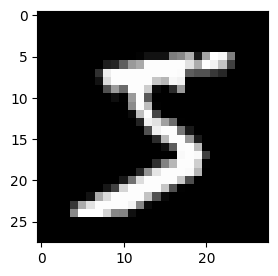

In [191]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

In [192]:
 from itertools import islice 

In [193]:
it = iter(lst1)
def f(): return list(islice(it, 28))

In [194]:
img  = list(iter(f, []))

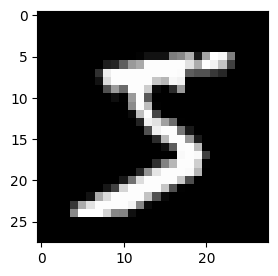

In [195]:
plt.imshow(img)

### Matrix and tensor

In [196]:
img[20][15]

0.98828125

In [197]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [198]:
m = Matrix(img)
m[20,15]

0.98828125

In [199]:
import torch
from torch import tensor

In [200]:
tensor([1,2,3])

tensor([1, 2, 3])

In [201]:
tens = tensor(img)
tens[20][15]

tensor(0.99)

In [202]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
x_train.shape

torch.Size([50000, 784])

In [203]:
x_train.type

<function Tensor.type>

In [204]:
imgs = x_train.reshape((-1, 28, 28))
imgs.shape

torch.Size([50000, 28, 28])

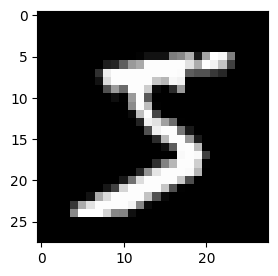

In [205]:
plt.imshow(imgs[0])

In [206]:
imgs[0,20,15]

tensor(0.99)

In [207]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [208]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [209]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

### Random numbers

In [210]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [211]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [212]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [213]:
rand(),rand(),rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

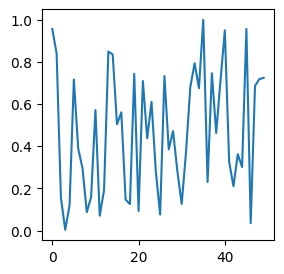

In [214]:
plt.plot([rand() for _ in range(50)]);

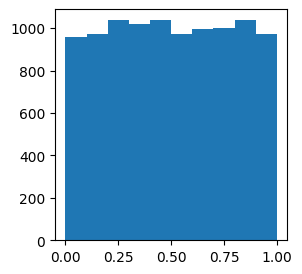

In [215]:
plt.hist([rand() for _ in range(10000)]);

In [216]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

4.14 ms ± 339 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [217]:
%timeit -n 10 torch.randn(784,10)

108 µs ± 38.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Matrix multiplication

In [218]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [219]:
m1 = x_valid[:5]
m2 = weights

In [220]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [221]:
ar,ac = m1.shape # n_rows * n_cols
br,bc = m2.shape
(ar,ac),(br,bc)

((5, 784), (784, 10))

In [222]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [223]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            t1[i, j] += m1[i, k] * m2[k, j]

In [224]:
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [225]:
t1.shape

torch.Size([5, 10])

In [226]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [227]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [228]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c

In [229]:
%time _=matmul(m1, m2)

CPU times: total: 969 ms
Wall time: 1.06 s


### Numba

In [230]:
from numba import njit

In [231]:
@njit
def dot(a, b):
    res = 0.
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [232]:
from numpy import array

In [233]:
%time dot(array([1., 2, 3]), array([2., 3, 4]))

CPU times: total: 46.9 ms
Wall time: 96.7 ms


20.0

Now only two of our loops are running in Python, not three:

In [234]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            # for k in range(ac): c[i,j] += a[i,k] * b[k,j]
            c[i, j] = dot(a[i, :], b[:, j])
    return c

In [235]:
m1a,m2a = m1.numpy(),m2.numpy()

In [236]:
%time _=matmul(m1a, m2a)

CPU times: total: 31.2 ms
Wall time: 110 ms


### Elementwise ops

In [237]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [238]:
a + b

tensor([12., 14.,  3.])

In [239]:
(a < b).float().mean()

tensor(0.67)

In [240]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [241]:
# Frobenius norm
sf = (m*m).sum()
sf.sqrt()

tensor(16.88)

In [242]:
m[2,:],m[:,2]

(tensor([7., 8., 9.]), tensor([3., 6., 9.]))

In [243]:
m[2]

tensor([7., 8., 9.])

In [244]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [245]:
%timeit -n 50 _=matmul(m1, m2)

1.76 ms ± 206 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [246]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = torch.dot(a[i,:], b[:,j])
    return c

In [247]:
%timeit -n 50 _=matmul(m1, m2)

1.36 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


### Broadcasting

The term broadcasting describes how numpy treats arrays with 
different shapes during arithmetic operations., the smaller array is “broadcast” across the larger 
array so that they have compatible shapes. Broadcasting provides a 
means of vectorizing array operations so that looping occurs in C
instead of Python. It does this without making needless copies of 
data and usually leads to efficient algorithm implementations.tions.

#### Broadcasting with a scalar

In [248]:
a

tensor([10.,  6., -4.])

In [249]:
a > 0 

tensor([ True,  True, False])

In [250]:
a + 1

tensor([11.,  7., -3.])

In [251]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [252]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

#### Broadcasting a vector to a matrix

In [253]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [254]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [255]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [256]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [257]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [258]:
t = c.expand_as(m)
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [259]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [260]:
t.storage()

 10.0
 20.0
 30.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 3]

In [261]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [262]:
c.unsqueeze(0), c[None, :]

(tensor([[10., 20., 30.]]), tensor([[10., 20., 30.]]))

In [263]:
c.shape, c.unsqueeze(0).shape

(torch.Size([3]), torch.Size([1, 3]))

In [264]:
c.unsqueeze(1), c[:, None]

(tensor([[10.],
         [20.],
         [30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [265]:
c.shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([3, 1]))

In [266]:
c[None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [267]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [268]:
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [269]:
m + c[None,:]

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

#### Broadcasting Rules

In [270]:
c[None,:]

tensor([[10., 20., 30.]])

In [271]:
c[None,:].shape

torch.Size([1, 3])

In [272]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [273]:
c[:,None].shape

torch.Size([3, 1])

In [274]:
c[None,:] * c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [275]:
c[None] > c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

### Matmul with broadcasting

In [276]:
digit = m1[0]
digit.shape,m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [277]:
digit[:,None].shape

torch.Size([784, 1])

In [278]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [279]:
(digit[:,None]*m2).shape

torch.Size([784, 10])

In [280]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        #for j in range(bc): 
            #c[i,j] = (a[i,:] * b[:,j]).sum()      # previous version
        c[i]   = (a[i,:,None] * b).sum(dim=0) # broadcast version
    return c

In [281]:
%timeit -n 50 _=matmul(m1, m2)

417 µs ± 84.1 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [282]:
tr = matmul(x_train, weights)
tr

tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
        ...,
        [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
        [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
        [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]])

In [283]:
tr.shape

torch.Size([50000, 10])

In [284]:
%time _=matmul(x_train, weights)

CPU times: total: 3.25 s
Wall time: 2.98 s


### Einstein summation

In [285]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [286]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
mr = torch.einsum('ik,kj->ikj', m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [287]:
mr.sum(1)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [288]:
torch.einsum('ik,kj->ij', m1, m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [289]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [290]:
%timeit -n 5 _=matmul(x_train, weights)

11.9 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


### pytorch op

We can use pytorch's function or operator directly for matrix multiplication

In [291]:
%timeit -n 5 _=torch.matmul(x_train, weights)

11.3 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


### CUDA

In [292]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

here's something that fills in one piece of the grid with output of matrix-multiplication, and we could do that in parallel because none of those different locations interact with any other location.

In [293]:
res = torch.zeros(ar, bc)
matmul((0,0), m1, m2, res)
res

tensor([[-10.94,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00]])